# Different methods to obtain the longest subsequence (increase and decrease) 

## I. Using Patience algorithm 

In [1]:
n=9
liste_to_analyze = [8,2,1,6,5,7,4,3,9]

### I.1. For the longest increase subsequence

##### Step 1- the first element will form a new list in a list of lists

In [2]:
list_of_lists=[[liste_to_analyze[0]]]

##### Step 2- the next elements will folow this rule: if the element is lower than one of list[0] in list_of_lists, it become the new list[0] of the list_of_lists[i] with i the smallest possible, else the element will be the start of a new list.Except when n=0, when a element if add to the n list of list_of_lists, a link is done between this element and the smallest element from the n-1 list.

In [3]:
links={}
for num in liste_to_analyze[1:]:
    added_to_list = False # creation of a maker that avoid more computation if the element is already in a list and also determine if a new list needs to be created
    for idx,liste in enumerate(list_of_lists):
        if not added_to_list:
            if num < liste[0]:
                liste.insert(0, num)
                added_to_list = True
                if idx !=0:
                    links[num] = list_of_lists[idx-1][0]
    if not added_to_list:
        new_list=[num]
        list_of_lists.append(new_list)
        links[num] = list_of_lists[idx][0]
        
print(len(list_of_lists))
print(list_of_lists)
print(links)    

4
[[1, 2, 8], [3, 4, 5, 6], [7], [9]]
{6: 1, 5: 1, 7: 5, 4: 1, 3: 1, 9: 7}


##### Step 3- from the last element of the last list from list_of_lists, we read the dictionary of links to restore the chain. the loop is define by the len of list_of_lists -1 (we have already the first element)

In [4]:
start=[list_of_lists[-1][-1]]
for n in range (len(list_of_lists)-1):
    start.insert(0, links[start[0]])
start
    

[1, 5, 7, 9]

##### Explanation of the algorithm number by number

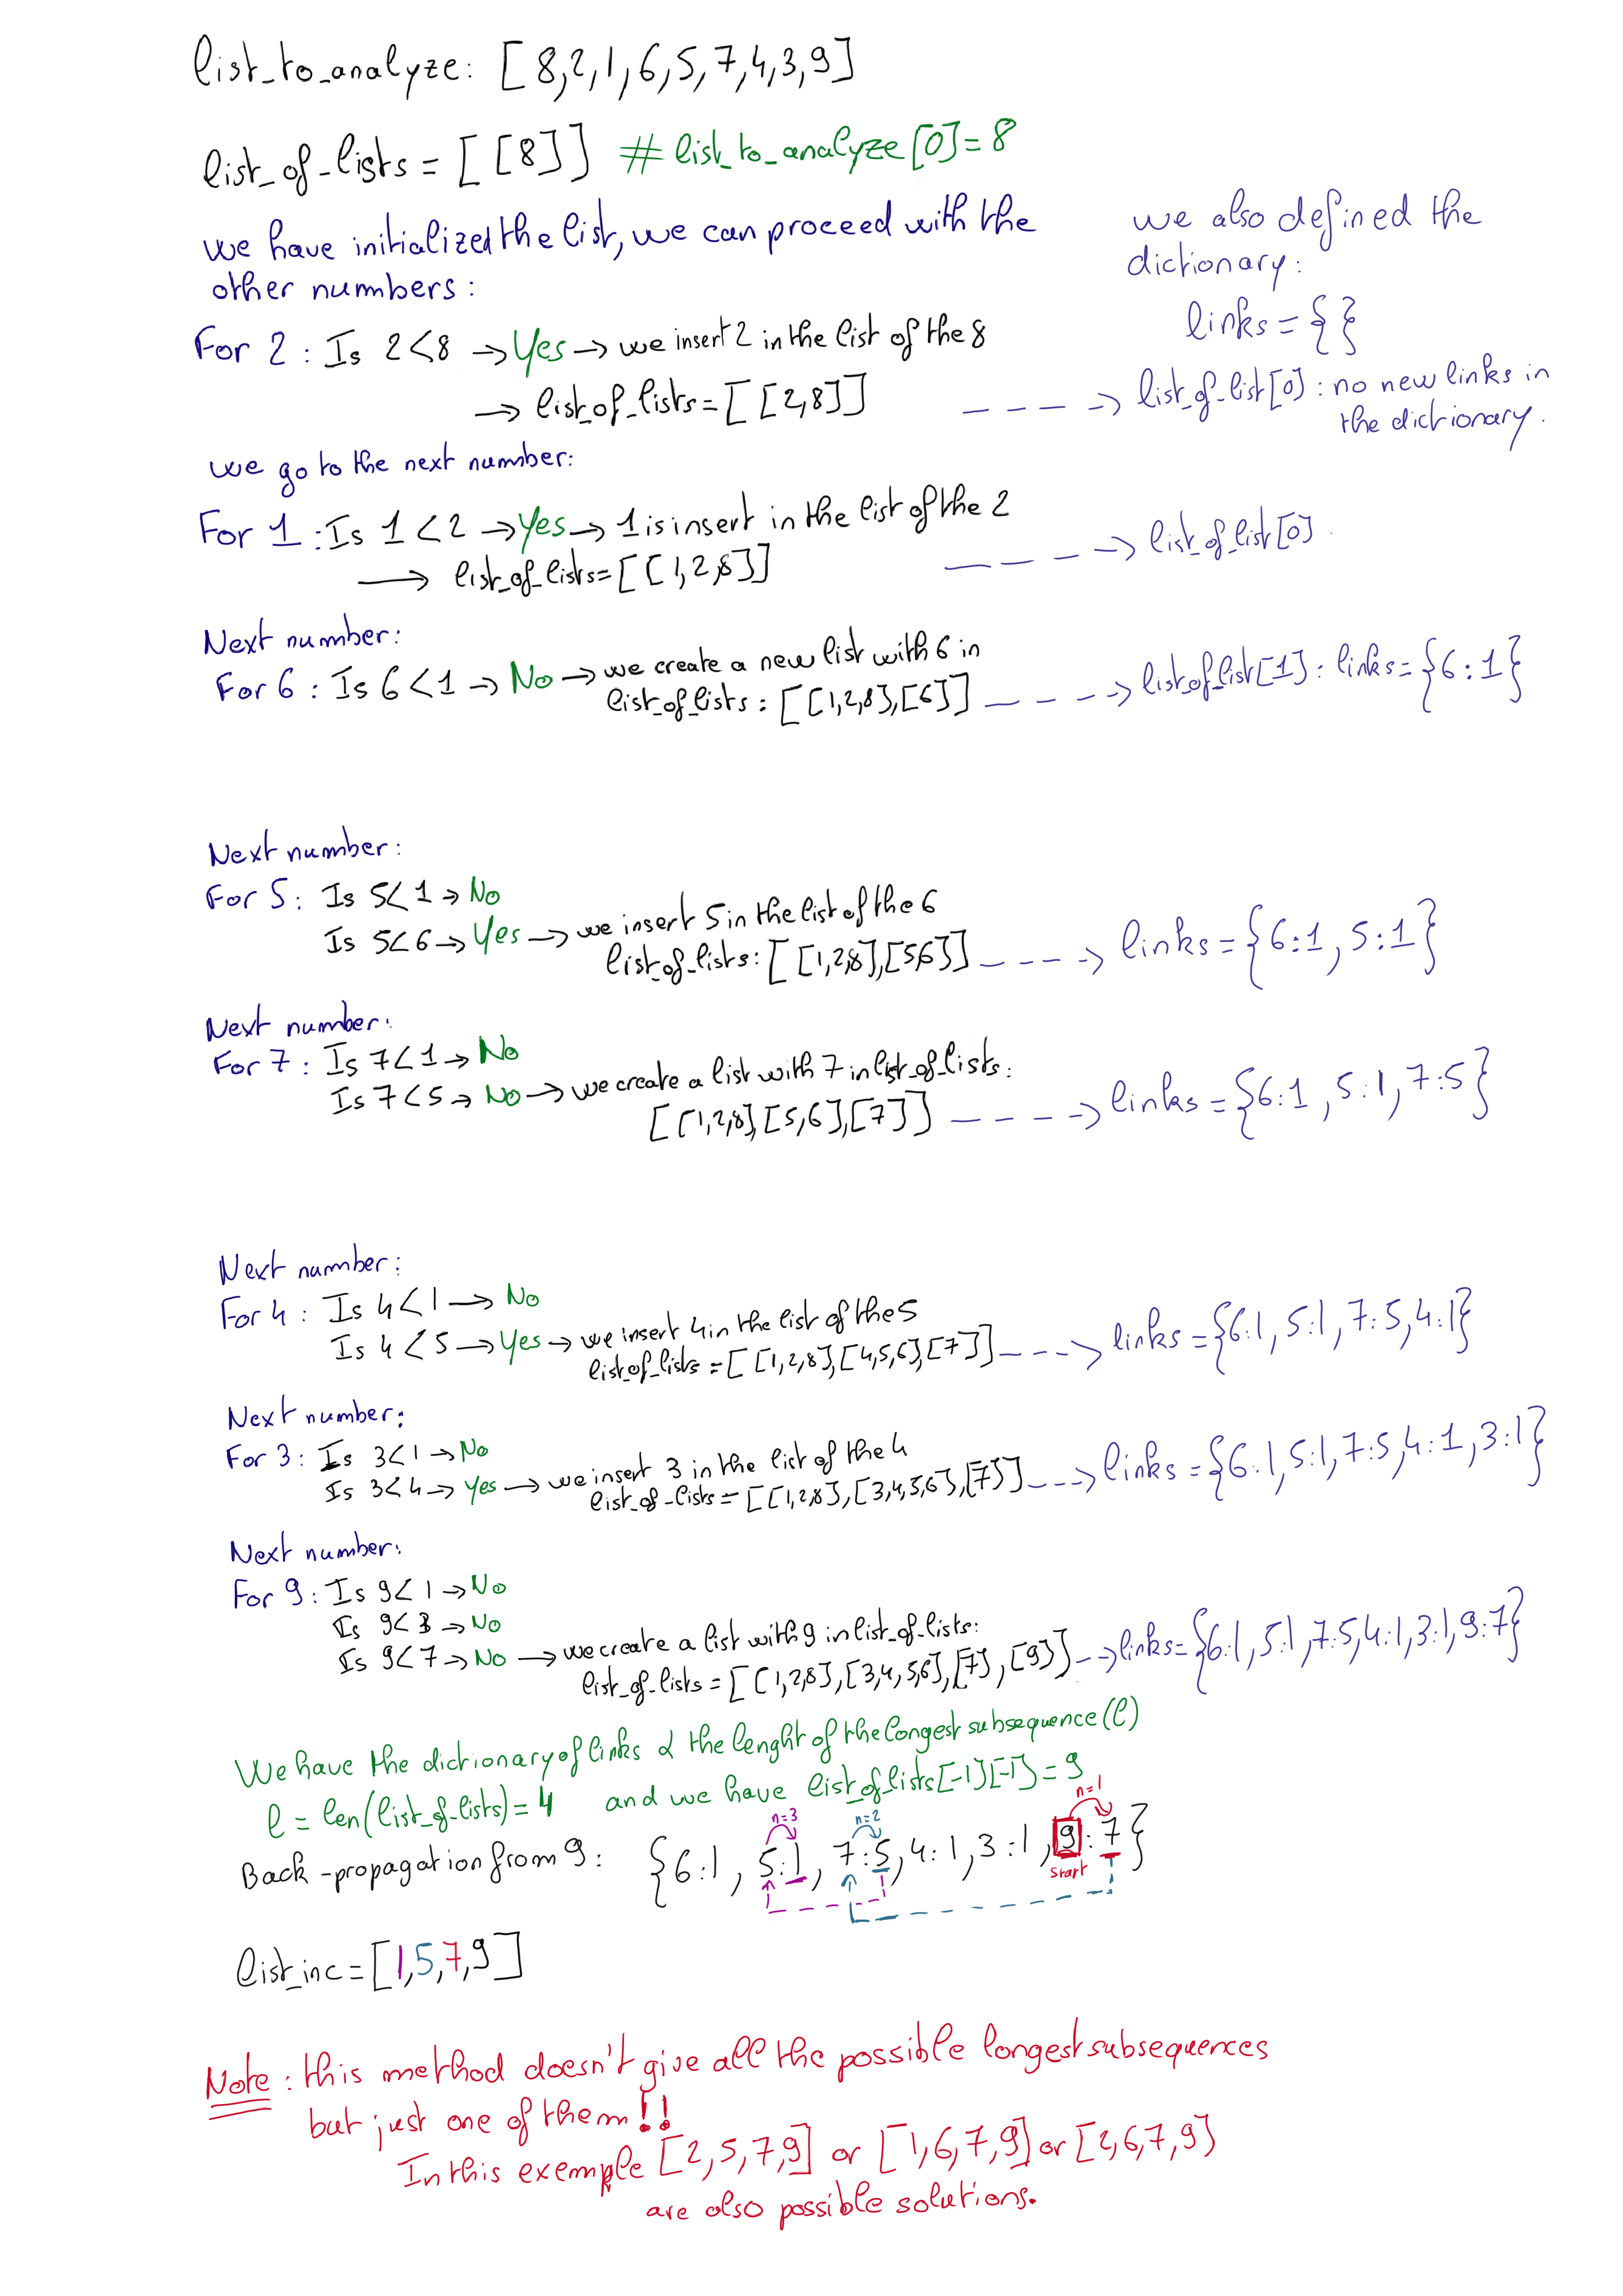

In [5]:
from IPython.display import Image
Image(filename="explanation_Patience_algo_for_longest_subsequence.png")

#### As we see, the len of list_of_lists give us the size of the longest subsequence and the dictionary help to back-propagate the chain to have the number composing the longest subsequence

### I.2. For the longest decrease subsequence

#### we gonna do the same but on the reverse of the liste_to_analyze

In [6]:
liste_to_analyze = [8,2,1,6,5,7,4,3,9]
rev_liste_to_analyze= liste_to_analyze[::-1]
rev_liste_to_analyze

[9, 3, 4, 7, 5, 6, 1, 2, 8]

In [7]:
list_of_lists=[[rev_liste_to_analyze[0]]]
links={}
for num in rev_liste_to_analyze[1:]:
    added_to_list = False # creation of a maker that avoid more computation if the element is already in a list and also determine if a new list needs to be created
    for idx,liste in enumerate(list_of_lists):
        if not added_to_list:
            if num < liste[0]:
                liste.insert(0, num)
                added_to_list = True
                if idx !=0:
                    links[num] = list_of_lists[idx-1][0]
    if not added_to_list:
        new_list=[num]
        list_of_lists.append(new_list)
        links[num] = list_of_lists[idx][0]
        
print(len(list_of_lists))
print(list_of_lists)
print(links) 

5
[[1, 3, 9], [2, 4], [5, 7], [6], [8]]
{4: 3, 7: 4, 5: 4, 6: 5, 2: 1, 8: 6}


In [8]:
start=[list_of_lists[-1][-1]]
for n in range (len(list_of_lists)-1):
    start.insert(0, links[start[0]])
dcr_list=start[::-1] # we inverse the final result to have the decreasing order
dcr_list

[8, 6, 5, 4, 3]

### I.3. Establishing the definition

In [9]:
def long_subsequences_by_Patience(liste_to_analyze):
    
    list_of_lists_inc=[[liste_to_analyze[0]]]
    links_inc={}
    for num in liste_to_analyze[1:]:
        added_to_list = False # creation of a maker that avoid more computation if the element is already in a list and also determine if a new list needs to be created
        for idx,liste in enumerate(list_of_lists_inc):
            if not added_to_list:
                if num < liste[0]:
                    liste.insert(0, num)
                    added_to_list = True
                    if idx !=0:
                        links_inc[num] = list_of_lists_inc[idx-1][0]
        if not added_to_list:
            new_list=[num]
            list_of_lists_inc.append(new_list)
            links_inc[num] = list_of_lists_inc[idx][0]
            
    list_inc=[list_of_lists_inc[-1][-1]]
    for n in range (len(list_of_lists_inc)-1):
        list_inc.insert(0, links_inc[list_inc[0]])
            
    
    
    rev_liste_to_analyze= liste_to_analyze[::-1]
    list_of_lists_dec=[[rev_liste_to_analyze[0]]]
    links_dec={}
    for num in rev_liste_to_analyze[1:]:
        added_to_list = False # creation of a maker that avoid more computation if the element is already in a list and also determine if a new list needs to be created
        for idx,liste in enumerate(list_of_lists_dec):
            if not added_to_list:
                if num < liste[0]:
                    liste.insert(0, num)
                    added_to_list = True
                    if idx !=0:
                        links_dec[num] = list_of_lists_dec[idx-1][0]
        if not added_to_list:
            new_list=[num]
            list_of_lists_dec.append(new_list)
            links_dec[num] = list_of_lists_dec[idx][0]
            
    list_dec=[list_of_lists_dec[-1][-1]]
    for n in range (len(list_of_lists_dec)-1):
        list_dec.insert(0, links_dec[list_dec[0]])
                     
    return len(list_of_lists_inc),list_inc, len(list_of_lists_dec), list_dec[::-1]

In [10]:
liste_to_analyze = [8,2,1,6,5,7,4,3,9]
test=long_subsequences_by_Patience(liste_to_analyze) # test on the same list
for x in test:
    print(x)

4
[1, 5, 7, 9]
5
[8, 6, 5, 4, 3]


## II.Using Dynamic Programming

In [11]:
liste_to_analyze = [5,1,4,2,3]
n=len(liste_to_analyze)

#### for simple case when len(list) < 2

In [12]:
if len(liste_to_analyze)==0:
    max_incr_len=0
    incr_seq=[]
    max_decr_len=0
    decr_seq=[]
    
if len(liste_to_analyze)==1:
    max_incr_len=1
    incr_seq=[liste_to_analyze(0)]
    max_decr_len=1
    decr_seq=[liste_to_analyze(0)]


### II.1. For the longest increase subsequence

#### step 1- Create a list of 1 of lenght of len(liste_to_analyze) which will allow to determine the lenght of the longest subsequence

In [13]:
incr_dp = [1] * n
print(incr_dp)

[1, 1, 1, 1, 1]


#### step 2- Iterate over the element of liste_to_analyze to identifie if the element i is greater than its predessor, the process will also give us the lenght of the subsequence, these info will be stock in incr_dp

In [14]:
for i in range(1, n):
    for j in range(i):
        if liste_to_analyze[i] > liste_to_analyze[j]:
            incr_dp[i] = max(incr_dp[i], incr_dp[j] + 1)

#### step 3- from incr_dp, recuperate the lenght of the subsesquence but also the index of the last element of the subsquence that we can further extract from liste_to_analyze and keep as the element of a new list that will will contain the future subsequence

In [15]:
max_incr_len = max(incr_dp)
max_incr_idx = incr_dp.index(max_incr_len)
incr_seq = [liste_to_analyze[max_incr_idx]]

print('lenght of the subsequence is:' ,max_incr_len)
print('maximun of the subsequence is:', incr_seq[0])

lenght of the subsequence is: 3
maximun of the subsequence is: 3


#### step 4- Iterate for (lenght of the subsequence-1 to 0) to find the previous element and so on to recuperate the entire subsequence. For that, we verifie that the element is lower than the last element insert in the list of the subsequence and its value in incr_dp is equal to the value in incr_dp of the last element-1 

In [16]:
for i in range(max_incr_idx - 1, -1, -1):
    if liste_to_analyze[i] < liste_to_analyze[max_incr_idx] and incr_dp[i] == incr_dp[max_incr_idx] - 1:
        incr_seq.insert(0, liste_to_analyze[i])
        max_incr_idx = i
print(incr_seq)

[1, 2, 3]


##### Explanation of the algorithm using the number

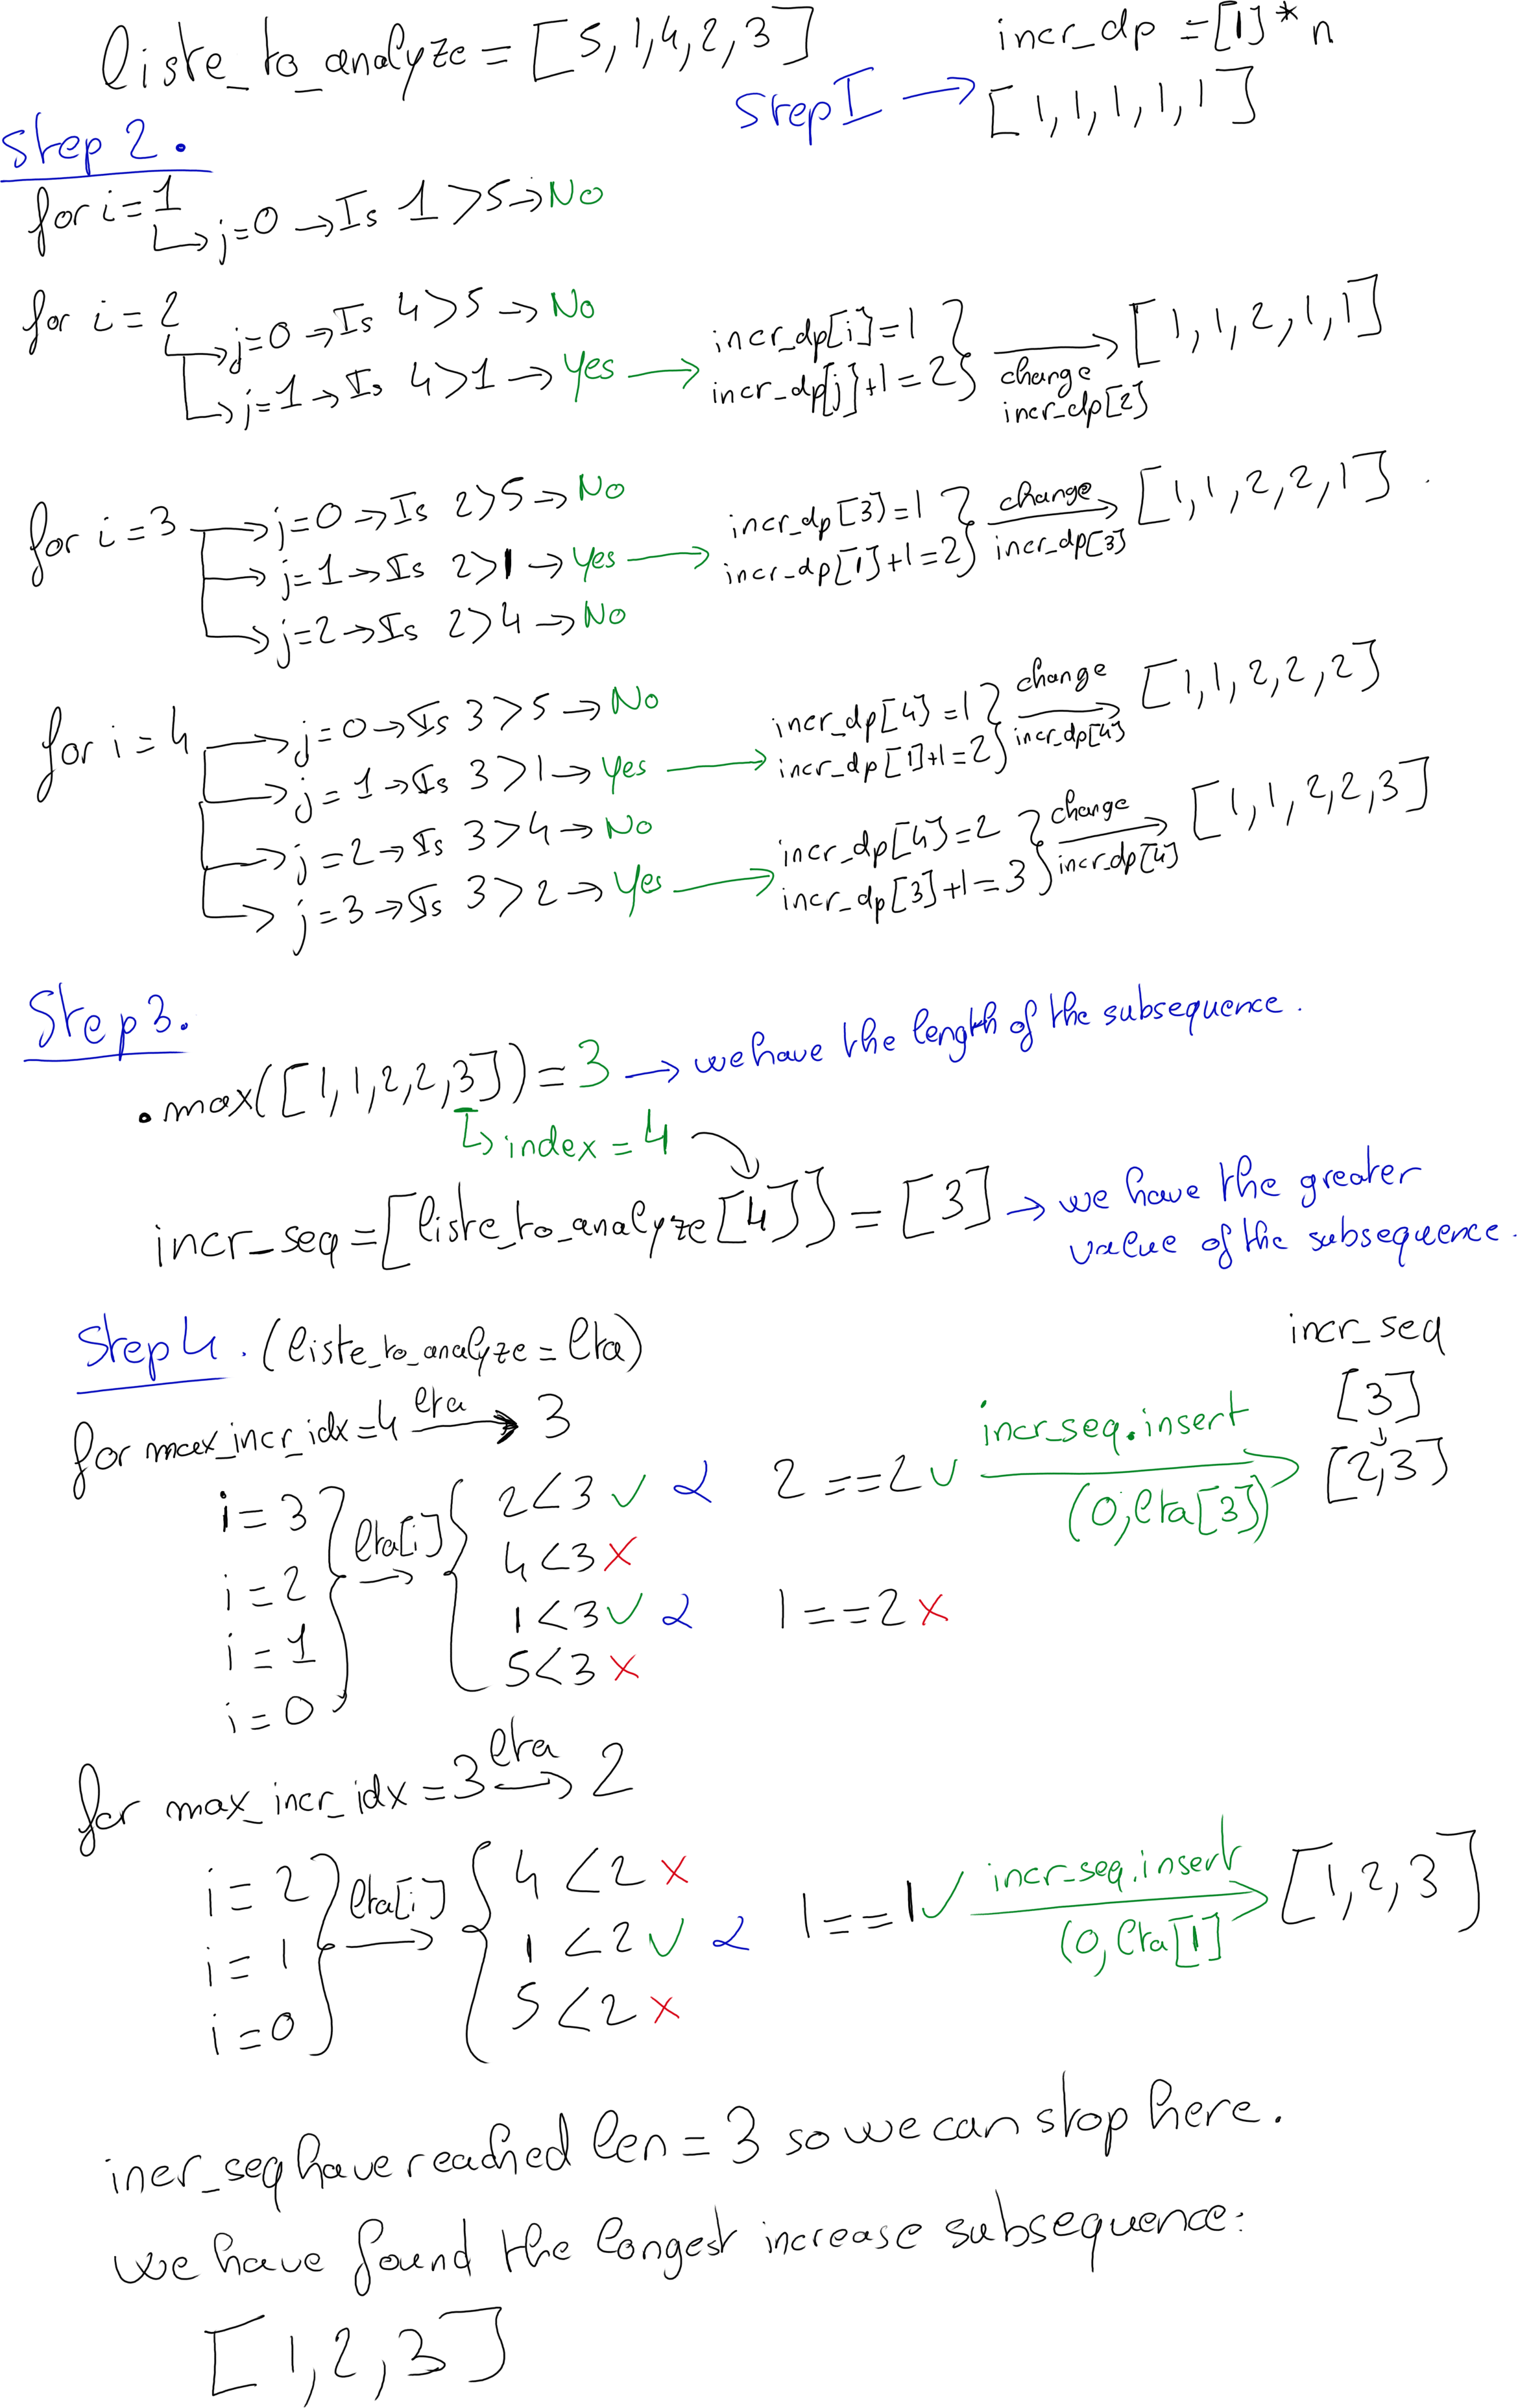

In [17]:
Image(filename="explanation_dynamic_prog_for_longest_subsequence.png")

##### We can already point out that more computationnal steps are required to obtain the results, this would certainly play a role to compute larger list.

### II.2. For the longest decrease subsequence

#### same step that for the increase but determine if the element is lower than its predecessor

In [18]:
decr_dp = [1] * n
for i in range(1, n):
    for j in range(i):
        if liste_to_analyze[i] < liste_to_analyze[j]:
            decr_dp[i] = max(decr_dp[i], decr_dp[j] + 1)
max_decr_len = max(decr_dp)
max_decr_idx = decr_dp.index(max_decr_len)
decr_seq = [liste_to_analyze[max_decr_idx]]
for i in range(max_decr_idx - 1, -1, -1):
    if liste_to_analyze[i] > liste_to_analyze[max_decr_idx] and decr_dp[i] == decr_dp[max_decr_idx] - 1:
        decr_seq.insert(0, liste_to_analyze[i])
        max_decr_idx = i
            
print('lenght of the subsequence is:' ,max_decr_len)           
print(decr_seq)         

lenght of the subsequence is: 3
[5, 4, 2]


### II.3. Establishing the definition

In [19]:
def long_subsequences_by_Dyna_Prog(lst):
    n = len(lst)
    if n == 0:
        return 0,[],0, []
    elif n == 1:
        return 1,[lst[0]],1, [lst[0]]
    else:
        # Compute longest increasing sequence using dynamic programming
        incr_dp = [1] * n
        for i in range(1, n):
            for j in range(i):
                if lst[i] > lst[j]:
                    incr_dp[i] = max(incr_dp[i], incr_dp[j] + 1)
        max_incr_len = max(incr_dp)
        max_incr_idx = incr_dp.index(max_incr_len)
        incr_seq = [lst[max_incr_idx]]
        for i in range(max_incr_idx - 1, -1, -1):
            if lst[i] < lst[max_incr_idx] and incr_dp[i] == incr_dp[max_incr_idx] - 1:
                incr_seq.insert(0, lst[i])
                max_incr_idx = i

        # Compute longest decreasing sequence using dynamic programming
        decr_dp = [1] * n
        for i in range(1, n):
            for j in range(i):
                if lst[i] < lst[j]:
                    decr_dp[i] = max(decr_dp[i], decr_dp[j] + 1)
        max_decr_len = max(decr_dp)
        max_decr_idx = decr_dp.index(max_decr_len)
        decr_seq = [lst[max_decr_idx]]
        for i in range(max_decr_idx - 1, -1, -1):
            if lst[i] > lst[max_decr_idx] and decr_dp[i] == decr_dp[max_decr_idx] - 1:
                decr_seq.insert(0, lst[i])
                max_decr_idx = i

        return max_incr_len, incr_seq, max_decr_len, decr_seq

## III.Use of the algorithms on a large sequence

In [20]:
string='3671 6867 3941 3236 2776 3666 7916 174 7528 6747 7030 1808 5941 7070 3068 2898 1799 1946 518 7363 440 7411 6066 2705 4469 5870 2557 314 6630 8371 4521 6966 1719 8169 6114 4659 1171 3300 2699 2095 4583 438 2977 6412 5210 7764 934 4175 2743 7272 1927 6230 4702 5019 2604 5724 4875 1520 4618 8010 7298 651 6025 2247 1806 4796 5525 6143 8547 4536 2556 4752 1090 1109 2488 1259 5969 941 7102 2742 4124 261 7515 1064 71 7658 4238 3869 5119 2089 6663 8361 8212 1984 1506 3531 769 1013 8115 3238 4492 4474 3633 128 8025 5079 1193 6483 68 7595 5227 1165 8132 4528 2833 2540 2624 5287 5917 2927 4518 4240 3898 3426 3676 2903 7169 1391 6240 1568 3951 6740 7158 8357 2514 2195 5378 7505 7758 2435 6795 6106 2545 2702 5652 8532 8461 2007 6028 6878 3946 2279 1303 2906 4626 7510 2119 5477 3229 5919 4468 5057 6389 1677 2298 3142 3452 3470 2562 7281 850 7037 1554 4930 3835 8172 5617 2505 502 2471 2731 1770 6291 5818 6431 424 6327 3679 8298 7303 6732 4028 4880 4557 1056 4448 1335 7935 2345 544 8131 2099 8142 2558 3697 4863 627 7909 3269 188 5032 7522 4961 7936 305 1735 2441 8313 2654 2038 898 1228 1369 7856 7121 3335 5578 778 5294 2640 7136 7938 5023 5635 585 4290 5084 8435 7944 8022 3456 2541 1712 6590 8202 2041 4458 824 1417 5074 7133 6243 3543 6251 1702 1210 6977 599 4985 1046 5436 3976 4095 991 413 7717 8415 4999 5177 5608 3091 1076 8286 8180 1787 6087 2939 4809 983 422 539 6480 2695 3432 80 2172 7235 931 1121 1584 7858 2266 8099 603 2811 8155 5695 8514 6131 690 4000 3204 307 3024 8559 1564 7587 3818 1814 5542 5585 5792 5306 1624 149 4704 8146 6524 8049 2233 2993 5463 7846 3701 4026 3891 85 312 7576 1897 2198 7215 1093 7115 5303 8348 3144 3733 3873 1512 6136 5363 5528 4424 481 8051 6368 4074 4939 1272 7586 549 3471 3431 7896 3464 4563 1302 2171 4190 7007 1461 1726 1262 7661 4746 64 2076 5997 636 8026 5010 3228 6650 5407 1797 7315 2681 5499 410 1054 598 146 4433 6694 2386 948 5061 3948 889 2531 5397 3379 4923 5179 5214 7394 1000 4319 6811 640 3884 1873 645 8450 6057 3330 1819 5926 4033 195 2110 420 1952 7472 6037 1623 1962 6177 2490 4273 5899 2463 6984 7202 7172 6779 2583 5471 6043 5978 744 6806 8316 1217 1581 2675 7199 3261 1753 2351 2051 3956 2573 1709 3015 8110 3086 498 3719 247 6019 7018 1956 6419 6838 7523 5127 7167 6951 3931 3510 5709 8005 1296 8459 4405 3164 5705 466 7548 5610 3866 6367 5211 3364 7336 5625 7959 7111 164 1330 1083 6934 6865 4091 8442 2183 5456 6440 6608 2741 5937 4698 5135 600 399 1543 7403 8048 2185 4957 5729 834 7567 7160 1500 2824 6340 3387 1032 5485 6793 1024 8119 6519 7813 6561 5924 1704 6078 7341 341 1941 4307 1419 4504 5108 888 7890 2533 7230 3430 2925 4329 8263 4366 1131 5590 4270 1372 2487 3968 5988 1527 7922 8080 3309 6282 2252 5484 5062 5622 457 3214 8209 3916 5749 6124 8436 541 2598 7001 5095 5426 1300 6460 6437 5962 8092 3188 4690 5803 8205 1124 6586 1612 3829 6038 4320 1798 8546 8411 2793 4068 7106 6879 8165 1526 6298 1906 3925 6092 6122 6662 379 3472 4760 3030 6999 6224 47 1989 613 6821 8221 6909 6725 564 861 98 892 2526 5857 4086 2620 5897 3428 680 2521 3272 8128 1188 1646 2173 4662 3740 4444 4200 6050 6194 2967 3804 1611 7864 2328 3647 166 5680 3717 5658 4227 1394 4919 7836 6471 6970 402 145 6215 1307 1694 4333 6463 4285 1218 3171 4487 5910 4673 1676 5593 1547 1102 8145 7666 6651 3517 3301 8367 6113 2417 6146 7271 7055 6911 1213 1280 1872 3218 1265 4018 6088 4968 3858 7129 1224 1428 777 1780 2814 1274 5982 3772 1755 6587 7479 5821 8502 6482 7973 2668 6632 751 1964 4184 4387 5996 334 2323 3648 6155 5346 2216 6896 7997 6104 5334 4723 8304 3918 8364 7178 6857 7563 7535 2554 4344 4194 5284 7290 6383 5715 1551 981 3159 5929 4002 4933 7977 6783 6004 1034 1073 2849 5900 4868 8073 2468 1530 3526 7117 6444 4552 7032 882 896 1037 3359 3704 57 4806 5479 987 5285 6403 714 1318 2801 408 7 2908 6241 5316 5958 4831 8437 741 4567 1571 6296 6182 7187 95 1278 1030 7109 3103 6596 3999 139 4144 4983 4657 1649 4935 7673 942 5780 194 8228 3912 2120 1123 5299 1092 3757 5766 2251 7627 8549 3152 6306 558 785 2493 340 215 5198 5806 4114 7565 7829 347 3944 665 1145 5845 6904 7573 8500 3154 4826 3652 1599 5387 7837 393 4212 761 77 7826 594 2070 7851 1125 2986 2176 151 4276 4984 6133 2544 2603 3923 6609 3003 2950 1266 740 7735 4869 6121 6870 628 7146 8405 1497 4031 5068 7213 381 3014 8386 1311 2789 4885 511 6467 269 129 1491 3343 5752 5466 7760 1519 3587 1367 1017 1321 8391 3930 7569 1170 854 2757 1559 791 8439 6514 6935 5933 8004 3519 6652 4037 2147 6819 5247 1900 6280 8564 4943 3356 3663 2919 7358 2383 2825 1389 3574 6416 5054 3353 8517 255 1909 6418 5125 4236 2952 8512 1505 4364 3512 7056 3495 4134 4397 602 5342 7101 1604 5922 4349 1883 1931 5465 901 5916 7603 4675 5597 7039 1619 5396 911 6730 4938 1378 7504 3139 8438 4041 3023 5390 4368 5275 2357 7350 1149 8006 1790 1069 1579 1708 2452 7227 752 6543 1985 5037 428 4413 757 326 7865 8322 450 162 2001 3170 8114 1662 3484 2566 7470 1869 5195 3000 5051 4622 6300 2002 6253 5336 8032 4110 2918 4856 3485 6174 5452 8340 6799 606 2140 6852 4910 2230 4586 1465 3034 5679 7511 251 73 813 3333 530 4710 4582 8387 3318 6373 4483 4737 6876 2750 2311 4531 7796 6401 4764 2413 5082 7085 2733 2428 4565 5505 8337 1362 8375 846 7355 2990 1815 1211 3176 5420 5559 8333 5343 6771 4402 1273 3631 5953 2945 4282 5273 1485 2635 3518 1821 2909 2498 1880 8444 2997 5245 5489 4048 3062 3199 7492 3251 138 6310 1595 1401 5472 3066 4927 566 4507 1569 6054 5644 8302 8282 60 912 4813 5944 6743 6209 8447 4993 5324 685 2358 718 8283 4038 3580 8148 835 4265 5568 6971 951 535 1914 6830 7940 2837 1558 8402 5998 1899 4780 5443 3231 3846 4912 7709 4185 3942 6297 4568 6653 7095 6580 6278 4076 6125 8404 158 7581 6350 417 5840 1705 4905 3189 6204 2158 4223 4419 4515 3247 7241 762 8389 6625 1257 1005 2882 1240 6051 557 7723 1358 2401 4229 7761 7653 8504 7327 1095 4527 2365 1544 4326 6362 8042 5760 5277 6405 3493 1480 6391 7011 8161 7599 900 2697 4804 7412 1186 5756 1820 6780 6372 8467 6572 2024 2774 2838 5312 617 6364 7077 7182 8151 4056 6486 7752 550 3601 8522 2205 390 3544 3734 5839 8433 6244 1875 2765 1516 513 6875 58 6941 7309 2064 2019 2595 4111 6617 1644 7431 2842 3445 2729 8443 4794 2018 4255 1194 202 1156 5237 3219 6232 5950 425 4479 75 1251 8458 5333 7645 885 3503 320 7474 8483 439 1847 6477 4797 8057 7669 5535 2476 7554 7378 6288 4491 686 3771 7175 8085 5447 7399 4914 5097 3099 3537 2242 3680 4497 5003 5325 6260 5582 442 907 3533 8419 311 2391 6605 8105 3126 6523 2781 4574 4410 6737 3861 1322 3653 4049 4449 5986 8406 6380 5871 7016 452 8318 8038 218 8254 4120 6007 771 6886 181 3071 6956 2579 5589 6491 7287 1929 6938 4580 126 252 1168 6436 2823 7683 5828 814 1992 8024 1573 3130 3608 7825 8223 7746 5718 7392 8488 5649 1593 4173 8016 6496 7741 6212 6248 7312 4584 4904 7103 5229 2878 356 3401 6101 2352 6468 6800 1470 1534 5007 749 7797 5572 1230 6118 6671 7415 4503 5641 5835 5302 44 2785 5116 6986 2880 893 1225 8096 529 6635 2670 4332 4490 3852 493 3165 7361 6148 3026 443 12 8009 20 4688 1292 7585 1009 6615 154 1015 745 6809 2539 1778 5656 8485 6741 1206 226 3699 6379 141 5932 5712 1917 8277 5114 1942 5278 7148 3837 915 6768 2331 2305 3522 8341 3514 2072 370 1892 3677 7908 2008 7051 3862 8317 3756 2867 3799 5138 1469 8525 6854 3982 6728 1905 1990 4309 4426 2220 8319 568 3492 765 4010 3476 375 3834 5896 4969 4081 3048 7546 818 5296 5145 5481 4512 4537 6075 5449 2999 76 1614 993 4727 3797 8390 1533 3056 6210 3573 5698 2128 2237 2912 7868 1238 7207 7524 483 2795 7652 4250 156 6666 3043 1479 1449 1153 8420 3943 4230 3924 6644 3207 3289 4395 7119 6149 2288 1965 7120 5537 4918 6668 3796 601 5000 7630 2829 8238 3847 4680 7498 6013 7623 7891 4411 1865 3064 1464 4271 7631 7384 3781 2764 2287 6701 973 5606 6555 6218 2613 1957 894 330 6945 5377 3524 6822 2575 6163 7402 1063 6546 5264 7279 4833 4415 5765 7500 7144 5289 7748 8232 4849 2587 979 6082 1048 56 2206 860 2093 3819 731 677 1134 6551 7340 1250 4116 1602 2696 6167 6498 118 7334 2361 4294 8224 8055 1993 7465 7583 3787 7099 1689 543 7711 7832 4792 3303 923 5162 811 7142 2751 1360 5692 4165 489 6554 6890 2569 2590 3532 6145 5609 5389 2423 2419 1856 4859 2820 1890 4890 4268 143 276 725 2188 6639 1354 4852 4379 4612 6899 6658 1310 5203 917 2105 1079 1468 2189 3256 867 2148 3509 4587 1398 5674 5453 6512 1361 6354 8047 6123 4857 1585 8472 7409 6767 2467 7782 2872 1337 4150 6948 3707 4988 843 5638 5123 4484 1195 1548 700 8136 6926 3933 6960 5193 8217 797 3971 2622 2090 7073 8000 3860 4959 6661 7694 8034 5550 5758 7418 6588 503 8326 1375 711 6827 3409 4628 2029 7742 2516 4842 3922 1039 971 3028 3989 7941 3906 4953 287 2410 6687 4072 5906 6207 3723 4532 246 5 7845 8262 8242 2617 186 8285 6703 6841 8403 7886 2032 6983 3746 7606 1248 8530 4162 4775 1184 122 3970 6446 2326 7050 7904 8535 298 5931 6963 830 1232 6756 7972 2138 3572 4547 4840 1556 6829 5029 673 5497 801 5150 6567 5657 5977 5869 3081 1444 1831 4654 8474 4201 2524 8521 2014 368 7621 2060 3345 8463 3203 1304 259 6283 293 1352 6161 6574 5734 4566 8426 7285 1528 4645 6489 2600 4016 5094 1777 7262 534 8013 3886 4606 2647 6545 6172 3560 444 4687 4136 5548 1578 1518 8191 4847 6150 1754 5238 4301 3849 8149 3520 5172 8086 6606 933 7734 669 204 4963 3743 397 1835 1601 6711 5516 5444 6358 7041 5077 6093 8125 6873 1136 5344 2283 2627 244 5073 2440 8394 2353 2845 6709 3222 1356 7157 2135 2923 1625 6845 6451 6656 7249 641 4932 8520 1606 5980 8162 1025 3902 3169 3844 10 3789 2219 272 3739 789 3984 2732 6289 3579 4015 2306 3632 2293 5228 1826 2348 5974 1173 4978 2901 6751 4001 4085 4879 5006 3259 5434 4877 8505 66 5702 2616 8166 6103 3607 201 6929 5016 7568 5946 5613 614 3754 2805 7954 18 7274 4280 5431 3651 3039 2794 6325 7950 4601 4971 3198 7422 6676 3507 2582 1478 6461 1182 1836 7681 4821 6077 2313 2798 1737 3901 1050 2711 3454 5785 4561 4850 2665 8257 1458 485 7071 5956 5722 938 6221 7844 4692 4770 5518 5737 455 8312 6532 7233 2 4861 5004 6893 2277 436 4340 4763 7924 2571 7019 7024 7968 5034 1139 2481 4454 1744 4496 2507 6942 7345 8243 1645 6239 3135 643 5607 5033 1400 6346 6388 4052 4104 976 1160 2713 5894 6782 6887 7526 8018 2092 1329 2577 6828 977 7221 7289 7900 7613 1119 4374 6925 2972 5269 4629 6363 5326 6647 7342 6584 3029 6975 3339 2637 7503 2958 295 1141 2479 3876 618 6936 7570 5867 7507 2664 3299 2712 1582 5129 2030 3444 1521 4121 3826 3919 5858 3020 5655 3284 1871 4146 4035 432 1178 197 6604 8377 2292 5192 5833 4027 5721 1198 2259 3541 2988 3186 3035 7349 265 4974 4925 3609 5065 2212 8284 4039 7937 4486 7684 1858 5824 5810 6026 2403 7995 4182 920 1077 1247 3779 5370 2087 3425 5961 6423 316 7551 8508 4394 766 6128 5741 7168 7174 2037 5260 3973 2584 7726 3451 5632 7478 786 4337 1038 7083 2281 358 1834 7921 2245 7294 2766 5281 650 115 2063 4059 46 967 3405 7076 6277 615 8156 7877 7219 7434 369 2546 2520 6129 4274 2803 2453 3193 5367 1223 7680 1653 4768 5546 1404 6585 6927 1495 6385 4734 6863 3210 8037 572 4100 6112 6733 2033 5146 4575 4157 345 1546 5783 4931 2446 1147 8043 7343 7765 8079 3489 1633 5351 5834 4660 2131 5170 1680 4221 7695 4520 7502 4046 8381 3881 2204 7332 8017 7008 8294 470 5361 1851 3656 5889 5188 3662 8493 448 4132 315 688 5515 7325 7388 7223 7906 1423 3488 7781 4293 1110 4373 5087 2209 5356 2974 3500 1022 1080 2982 5272 3134 8003 619 7236 2614 6898 5825 7657 2367 6690 7229 1891 1877 6392 4347 638 2225 5445 6698 8471 8477 5482 1616 4382 5254 3127 2929 3604 6573 2953 6352 3542 3104 5570 7173 1930 5685 4155 7635 3357 7122 6621 5852 5372 2015 6724 2807 2725 2941 4977 7849 3880 4883 1742 8066 3995 3803 4299 4773 980 5714 6759 3054 210 3448 7911 6884 99 163 7171 2716 6138 3378 1640 7960 4615 2760 5169 6447 4127 8116 5320 5728 4829 5813 5599 7692 5746 3332 2933 822 2862 695 3831 4470 5017 8103 4761 3742 3466 4233 5777 2036 6940 6762 6579 6713 5645 2009 4106 7150 3177 2808 4151 2133 1567 4594 4199 5157 3494 6823 7614 5176 5588 4075 4263 4592 6719 376 479 2327 6583 7996 672 5637 3324 8050 6059 3190 6127 3727 2382 2054 796 5175 2224 1994 5751 1727 8509 1721 4854 4865 2108 1937 7715 1666 2303 587 7654 947 5025 2565 6271 2258 2012 2517 2536 2985 3027 6208 5918 3926 403 4247 1436 878 49 6205 4832 1158 812 4882 5951 8339 3855 7907 2633 1747 962 5430 8264 351 703 2068 7153 1538 4241 1807 6582 7126 5276 2851 3731 4741 5603 2530 6351 4495 2549 3550 3479 1943 5233 2677 8544 7087 7529 5391 6744 3775 6717 4051 4171 4747 6947 8453 1390 4179 7930 4441 5257 7744 8253 482 430 772 5860 4513 5440 5694 5936 7964 6268 7134 4003 1817 2786 8451 3095 646 3515 576 6748 4965 8011 8533 2003 7296 633 7819 8552 5066 6599 8309 5015 6162 6033 2111 3554 104 4635 4693 886 809 7534 5521 354 8130 7807 6612 2377 2621 3393 5086 7626 16 3223 555 4791 1933 2027 7104 4152 3263 5642 3465 2333 1229 2466 3267 2513 6083 5258 8248 7467 8077 5309 7556 8506 2703 2745 1536 6764 5315 4311 2102 8127 6670 4636 1507 1682 716 4884 6387 6548 6454 806 6338 6613 3694 1630 8490 704 45 2159 5686 3481 7226 3006 6111 6107 7913 4972 2098 6813 7002 35 6655 6048 631 5458 4161 7012 8227 5457 2832 5267 475 7088 7899 1687 8252 2395 1870 5360 6229 7316 702 1099 610 2494 6794 7698 418 1094 1284 4724 6024 6045 3562 5800 7618 2477 8120 869 17 21 3966 6105 1185 7282 6462 5628 3582 3141 8273 4745 6557 1397 5504 1695 6399 1413 6257 2691 5517 3996 3202 4281 3276 374 1953 1192 322 2930 7820 121 2715 2755 8140 6171 5313 6559 6981 3994 4269 5989 4109 7081 1475 966 3491 3038 3088 8157 884 4753 6511 3205 4370 1132 4103 5133 2449 6406 1972 6474 4354 746 1246 3077 4588 1626 1052 5640 1460 3118 1608 1983 5354 5809 7466 7419 6264 2309 5438 7584 4188 5225 6589 4647 74 2114 5745 1693 1357 5371 2855 6765 7131 4564 1976 5046 2139 464 4730 7939 7475 1841 4386 3939 1607 8275 2420 6422 203 3344 1027 5620 3211 5072 2996 5040 7749 1351 1969 2431 6992 5160 3900 82 4506 4119 2961 8104 6001 8184 5491 3538 2096 2232 8074 6349 532 3649 7793 6265 2116 696 7433 7978 3741 7183 7156 3903 1269 8553 7022 4798 7098 6556 429 4440 2975 3327 8211 3004 5560 7798 6187 4135 3310 7536 3017 4473 6357 1441 1561 2496 3972 2915 2379 6108 6191 3074 3442 5044 2527 8379 6682 5124 4314 8498 546 2354 4771 8561 2312 7634 3585 395 4608 1986 107 3842 508 8192 3599 1463 5383 6348 3867 3257 637 5747 1205 7094 2249 1537 3859 3614 1686 6069 8014 1384 694 6415 3403 6234 5297 5878 7084 1146 2319 7999 6803 2011 240 3440 8446 6906 3764 7145 5401 3293 3209 8164 4363 7140 5018 7210 3025 8372 7194 6195 5379 4681 4007 4873 836 5167 7004 1439 3365 7100 7755 6627 5587 2291 6353 6096 6335 7620 5165 4017 2461 3036 3630 986 5280 6442 1374 937 4722 157 8039 3363 3400 7558 2578 6199 3042 7589 449 1047 3304 4788 6982 5523 1070 3667 7395 3092 5338 8359 4286 8219 750 6003 698 5720 1431 2045 1596 3688 7320 4664 5844 3659 7804 6905 5274 3175 7527 6552 1698 8441 6382 6286 4870 4131 2310 4014 3216 6953 2646 4697 7397 3726 2519 6558 848 8518 7352 2389 8190 7605 3687 8193 3877 7600 4811 4148 2761 4539 2363 3295 5398 6770 1846 516 3979 268 6591 1252 5949 978 2875 7727 1731 2659 5883 8519 500 2366 3583 2304 5703 1958 5501 3447 4359 8548 974 7484 6190 4544 7089 4249 6505 4013 1044 8306 4398 1382 8495 3224 952 8176 2612 3404 4361 7651 2567 7859 8134 1535 6620 3265 4403 8292 7757 1019 7544 819 1796 274 8265 207 6376 5308 5532 1523 7021 595 378 5753 4595 808 4406 1434 1249 1586 4191 1750 5558 4130 8478 2692 3557 2887 926 1861 4529 231 3109 6721 5069 1395 5915 5696 7828 2538 70 5902 851 3172 7086 4691 710 7078 5738 8245 6493 1308 7458 5427 1373 5323 7730 7313 2657 2442 6044 144 6394 4597 2392 2142 5194 7561 3786 2359 642 3785 3703 5955 2928 3552 7811 7927 605 4540 1088 248 3548 7636 7866 7273 7179 3163 3317 1399 553 6438 3718 4819 4979 5508 4649 8207 883 5448 5663 4297 221 955 7367 2643 5279 8230 242 6206 3650 527 2787 1406 8274 2229 4738 2244 8554 559 4437 4505 4967 2375 6848 6464 6021 4367 1811 7288 1325 5486 1605 2058 5008 5183 6110 7488 788 7365 1203 1947 5943 2662 8479 4113 4244 2084 3160 5250 7591 2828 5706 2006 8321 8331 8067 7351 5024 4908 7377 5337 6285 7189 7768 5796 2338 1004 5483 8555 6034 728 4603 5104 8417 211 1295 2747 2213 1108 7314 4439 3370 3540 1385 2937 5216 3709 2264 905 6920 361 6910 7335 1342 760 5643 5836 8543 5574 6669 2586 5416 7256 872 3195 6686 1679 4348 1613 1716 5220 1366 2797 7031 8352 3047 8036 3499 5217 8007 286 4641 5147 8028 3212 7261 8469 2492 1622 5230 3882 7790 3527 782 5600 3117 5163 2145 4447 2344 4950 2226 6175 1268 8408 7610 7276 1849 8330 8052 4502 6967 5058 2770 1254 7787 304 755 6900 3578 1267 865 2451 5544 7064 7003 4245 7455 7901 1242 4267 4559 1549 5808 4610 6425 3323 1699 6275 1912 4609 4145 7047 5248 5512 3758 4599 5412 2746 3729 4815 458 1313 5970 7665 5318 2672 2634 4360 1189 5408 1263 2920 1071 8343 5292 5697 2021 6880 7863 5973 7905 705 2940 5895 4446 2094 6915 4522 6749 8229 7092 4261 4378 6281 2324 3184 8159 6284 2129 1010 7958 7970 960 8296 2066 5847 2300 2710 1725 2315 929 6636 2644 2374 6871 4744 5964 384 6540 1910 230 4750 5540 8410 4228 1854 8407 2718 3045 8293 4620 5403 1674 7427 1347 2231 3980 4422 5236 8280 3248 1377 2290 7188 3661 6858 3978 471 51 2917 1422 4501 7771 1903 383 8276 7429 7432 1804 6784 321 6254 4992 4054 8187 3905 8332 2892 5222 7424 6225 3381 6256 2687 6843 2437 1921 4391 8400 7206 3674 4571 3863 3340 5615 23 6595 4956 3101 1287 310 1 3682 8054 810 249 2017 19 3408 1167 7028 7928 1332 2340 183 7321 2886 4731 4525 4975 7993 7812 7622 2645 2075 8204 7998 5493 6276 1403 7575 816 5293 4305 3586 6716 1923 3778 3347 1112 1426 6864 6071 5243 6126 7010 256 7986 556 404 3854 7773 793 6176 8492 6068 2414 3336 7014 578 3692 3266 4170 2642 8416 3055 5476 3763 2869 7756 4913 4818 497 1700 3050 3593 7237 1234 4225 7264 4578 4556 3352 1878 4652 7059 8185 5461 8440 117 5509 3715 267 2385 4256 2630 2034 3762 2658 1128 6036 804 4668 3590 7452 6777 1609 5295 2593 4543 152 7784 7955 7963 3673 4069 8529 8324 6577 3271 1652 5221 243 3885 5754 8069 5181 477 5545 6018 7348 5711 1152 1087 5153 1654 6637 2506 2218 31 7075 3768 6135 3800 5571 5394 3851 4350 4356 2132 6040 4573 4962 998 1948 515 7389 5942 3501 6089 6692 1961 5667 1130 7842 2343 6510 7208 4058 1283 4138 866 8431 6395 5300 6326 137 4611 7347 3546 3965 3279 6530 6374 560 5090 8531 5187 5707 1855 3664 1678 4355 3233 4625 720 3182 1839 2445 96 1499 6991 6035 3720 7632 4740 2619 8353 4781 1181 6855 4805 7762 2525 8349 8222 336 6476 4899 877 8414 675 1492 8216 113 5921 2762 6228 4342 3296 5014 4998 3675 2378 1003 4183 7915 2177 864 684 3722 5437 7929 5768 2818 4820 5832 3955 3821 6746 7065 199 4807 5928 3913 184 1289 3275 40 8468 1241 4812 5676 1740 294 940 3450 4101 6299 5450 7468 8445 5764 6691 2088 1795 1448 4989 5151 4180 7759 3798 8173 2370 6192 737 7318 2289 160 3292 6638 1197 5197 1312 2394 1012 1600 7040 5804 2470 7414 6601 764 1061 5939 6023 5111 3285 2035 48 3619 5565 4425 1837 932 8481 1011 2400 7562 8215 2955 2576 6058 1264 997 196 2671 6293 7042 7176 6976 4209 7319 2443 3388 7530 1169 7818 1745 90 7920 7740 5908 5773 3075 820 3549 6459 363 6290 7118 5999 7306 2594 2683 6973 4259 2190 2752 5631 4619 325 8108 6200 5495 7949 2698 2016 3441 3780 5794 3150 456 1202 5552 7951 392 5131 1980 5618 4472 4317 1157 5202 3197 445 635 3107 89 5256 3744 4322 1220 4278 5884 6885 1696 1793 6064 3132 4392 4754 4313 8106 6502 1161 2444 7442 8194 2356 4248 6789 825 5592 1237 4258 239 426 4213 6611 1258 1758 5030 1829 3049 6503 3949 1462 5864 2936 3082 4034 1588 7299 5352 6331 3635 3908 281 7013 736 4954 4554 4372 7192 4178 2295 3242 1336 1277 2146 3967 4892 4585 3255 3424 3268 596 2372 2074 367 380 2286 6994 7580 4683 5822 1661 3728 4457 4431 995 2989 7990 2307 3770 352 3096 346 1783 2796 1453 3012 7800 3553 5947 5263 303 6515 3545 5268 6132 5507 2450 6825 4560 5672 4339 6375 1260 148 1894 3057 1684 7300 5353 8098 3282 7344 4828 6592 7485 8356 8384 607 7989 4036 7704 1757 787 5805 994 222 505 3889 7852 8198 5519 5366 4428 551 463 5200 3069 1510 7678 5429 6098 8545 1545 8035 5031 3732 2042 6752 4246 2335 4358 4630 6478 2482 5362 3915 1598 4785 2922 8307 7578 611 3434 5064 3865 6776 4237 1830 6995 3226 8536 3217 1592 2981 2436 7815 86 6640 7337 949 873 3605 2234 3788 6270 6856 895 547 4549 4399 8113 3260 7659 6624 167 2966 1062 7962 2618 7714 3589 5675 6681 6455 2813 6769 1590 1164 4160 5579 7979 1172 5786 7295 1333 1067 6657 5817 2885 5369 5960 1805 4808 7957 2840 4726 579 4303 4438 1874 7643 2371 4551 2406 2607 8058 652 3390 6881 6213 3581 4466 7443 4901 1926 4079 8203 5689 54 608 4872 5530 2238 4614 2433 2704 6309 4176 5563 3748 6781 2979 826 1006 5687 2330 4671 1881 6238 5173 6892 3657 1648 7971 8289 8188 3076 1809 127 2631 3019 6787 7985 874 5547 3716 3911 5374 8046 1974 4898 3584 723 4341 7360 8491 1175 8167 2763 7690 2085 6159 4226 6060 6531 8200 2655 2768 2332 5395 6311 5531 2911 1488 1647 8362 7258 2086 1200 5838 927 7980 2669 1939 3646 3816 6479 2097 4198 1425 7067 2181 2191 1642 8240 8234 2211 177 4045 2214 6924 7222 182 2588 5290 6614 2390 2891 1859 4328 338 4480 176 134 1075 4644 7918 8040 7093 6010 4351 6643 2273 2000 4475 2404 4757 7165 7875 4163 8482 6597 1187 5901 200 1055 5364 674 8320 6490 3206 5948 6518 5837 55 2317 257 7703 1768 2884 2532 3325 1577 6507 4287 5659 4335 6933 8378 1414 8329 3964 5829 5199 6072 6407 3669 5206 3569 6302 4666 5428 5846 6836 1621 4851 3566 1635 6775 2026 1101 3273 4445 1852 191 3879 758 6788 5022 5863 2528 2649 4739 453 2542 6294 930 6006 5494 3525 6307 3774 8053 4846 999 6629 495 5036 7774 7401 1575 6002 5633 509 3262 6968 798 8374 6052 4463 5781 1615 656 3112 7965 7438 7794 2434 3187 6242 1036 2529 5801 2831 3993 3626 7919 7792 5213 5100 5490 1392 4089 7838 8432 1670 5139 1053 5382 3981 5538 5842 7767 2856 6791 5611 5713 6697 4032 4187 7382 4604 1084 845 7426 8392 8399 1714 1089 3750 623 6203 8095 5049 1617 65 5446 219 6980 8008 1907 4423 1381 3100 670 2744 4891 6197 3115 3959 4994 4581 506 4944 3478 7885 4084 4920 4867 7166 4598 975 5439 3977 2535 2965 1660 398 4412 6084 7305 6998 2822 2890 5223 3987 7023 2497 6804 3628 6430 733 5543 2202 4823 8299 3018 3910 3312 3714 1122 1493 2240 7843 5070 3174 39 6824 5959 1639 7967 2412 7934 5566 3349 3394 1040 853 3328 1539 1822 662 1842 2690 1315 1072 5920 2835 7795 5779 4769 4097 5067 6259 1221 1059 3793 1711 6997 6504 4453 6533 6469 4158 621 2816 6014 4765 3326 5050 7708 1938 2155 538 2735 1245 339 3767 727 69 5820 6450 2756 6566 437 5307 7862 5136 753 7542 33 2552 4232 5591 6739 8181 3168 3730 3811 5474 3067 1103 3988 4020 6521 4177 4459 4137 3927 734 1810 5117 3947 4732 7480 6882 7278 5421 1243 324 3411 536 5021 8255 4012 8097 6099 5826 1908 8551 914 2046 3244 1739 30 5178 8465 8328 5930 657 1402 92 4508 7379 8513 570 165 3960 7574 3696 1999 1996 7267 4570 2079 6678 5596 4519 4108 6964 2186 5152 4427 223 3412 4222 3815 8250 7463 3940 27 3802 2454 100 4153 7564 832 4627 8434 6607 3482 5154 7293 5849 7404 8030 2302 3616 4720 6 6544 5027 4778 6157 5855 7124 2995 5435 2217 6648 2484 492 4243 5598 591 3337 67 5020 7686 4844 5553 7674 7493 3712 2734 5935 2910 6758 7925 4952 7988 4338 3213 8516 7044 4429 4677 6295 8081 5400 2894 7138 8133 5043 4678 2407 4219 6527 1743 8251 1159 8376 5012 7444 108 1631 8457 4711 4602 6917 2469 1442 3805 3753 2462 490 25 2208 3698 4871 4460 4535 1764 2758 491 4073 4694 1511 5140 7326 1729 4696 2039 2101 7577 1293 6969 7224 5005 7823 3423 807 6409 7130 6424 6056 8278 1730 3893 7375 3321 6185 3783 3997 3138 8470 2416 2061 3909 3894 7408 4218 4208 6330 7833 8044 1421 3620 2005 2935 6165 1893 554 1803 232 8562 7712 5893 1319 4189 2589 6778 6314 768 2456 6429 1155 2124 815 7063 124 6522 871 7733 8336 2876 7015 7706 5096 3678 333 1447 6336 528 2178 5026 7640 2248 1320 7254 5891 1987 5414 2916 8393 8449 7873 5830 2802 2650 1759 4533 6734 8528 7724 357 996 6370 2888 840 6180 3848 1270 2065 411 2269 6796 5113 4991 6301 2152 2197 6696 1550 1127 2144 2055 7091 6790 2415 2193 2679 868 8141 2126 3307 88 5105 2109 1065 7390 5966 1235 5650 7052 7540 7195 2976 6972 5381 2810 6571 6616 5317 7675 3895 1981 6569 3766 8065 4605 8244 1058 6371 5112 1720 4735 1041 7097 3148 1174 958 2983 3315 4948 1895 3644 8556 1327 8413 7440 1935 863 279 2267 7776 7450 3005 5251 2895 7416 3453 2861 5415 2949 2334 6235 4207 1256 5843 377 5816 8195 6005 2115 6535 5564 5681 1884 2868 213 4168 6950 3496 8020 1456 2563 4053 6731 8398 4973 7786 6246 8290 1020 2848 4946 7026 5404 1583 7243 6184 5271 5793 1107 1438 5750 4215 2296 8117 3153 4417 5634 6308 8355 6319 5101 706 29 1316 2984 5859 1466 2754 6219 1297 6602 1275 4893 1144 6913 300 7406 5510 7228 499 5487 2602 3149 8418 7369 4154 8563 2337 3611 3443 3706 2899 1376 6541 5876 590 1407 2368 3929 1151 6826 2515 4550 3928 7593 1328 7263 881 4064 4331 7421 4167 3286 2626 217 2322 567 5872 6027 4098 3792 8123 935 7180 847 4542 7961 4381 1371 6593 8351 2900 1557 5909 7910 7481 959 7943 8497 1922 7932 3146 6402 8109 7391 5774 2722 3031 6202 3563 3617 409 664 3660 7000 6439 1359 79 6421 4715 6869 4947 1180 3878 2236 956 6500 4822 2830 5345 4409 2501 2044 2684 2580 3373 4057 119 5143 3245 2651 3079 2459 2081 8428 1343 3311 7220 24 359 6805 2297 1344 6245 1035 81 9 1734 7250 501 7590 7380 620 4181 7096 4793 41 3398 2043 1299 53 1418 3235 8338 3264 780 3319 5671 909 2623 1162 7912 1555 7048 1060 3592 1208 4733 6237 1541 2175 2223 1066 7647 1057 3872 3658 7385 6664 3355 875 277 5232 1954 767 467 3936 3693 6186 4638 1196 4922 3760 8427 2285 6679 4936 6812 1532 4725 5393 5149 1724 2228 1916 1255 8288 5743 2502 5529 4889 729 6030 4025 5305 794 5106 6008 1919 112 7876 8179 4995 1838 8012 2162 8182 5881 1517 4748 1386 6727 2174 3033 4040 1864 7400 7931 6261 5619 7113 2606 486 6849 3700 7975 1504 7830 5717 5854 3784 7914 5358 309 4498 1496 266 5091 5651 1353 1078 533 7428 1085 639 6501 1638 412 5081 7423 2301 1823 829 7516 1524 2164 8279 7159 1802 6773 6065 6305 1309 1655 3297 4005 6465 6011 6868 2957 2227 414 1393 2897 4377 8150 5496 3410 4755 7867 5433 4129 3316 1148 910 663 7417 3474 1415 3413 6345 3167 724 5888 4143 609 1029 6473 4617 7387 3534 3249 7884 1765 5892 6086 7225 4906 5627 1574 8258 3433 5576 4887 3839 3162 206 5244 5122 6565 1966 8068 5723 3871 681 7005 2059 4607 918 622 3011 2263 4534 6316 6485 6255 4903 1487 1629 7381 6396 7170 3290 4684 5549 1219 1843 3384 1868 6079 6987 400 2688 1751 2800 7496 1683 1387 4435 3516 1788 2723 4648 2439 1477 3469 792 5134 2772 7889 6160 4315 5742 2547 4210 364 7513 4115 7894 465 1904 6042 1818 1565 3422 1104 5218 5442 682 3008 1116 43 1733 2272 3402 1135 6164 6718 1432 7193 7769 4853 7732 8220 2719 6334 925 629 2069 6628 2871 132 1761 6321 2221 3853 3108 799 902 3486 3331 270 4192 7046 2156 1348 1380 8101 3366 6274 2067 4105 3155 540 7555 2574 2638 2020 4719 4401 5580 6198 6475 6714 6170 6361 8323 5441 8537 5733 292 4981 732 3636 6598 7789 3458 8225 4686 7439 2257 6053 2973 7616 5913 3157 170 2836 5963 3147 5688 3145 5144 5555 8226 3179 5911 7893 5646 178 6720 3348 2262 7809 6700 3683 6031 4825 1667 4257 3807 7248 2107 5038 142 7244 2180 7791 423 8078 4087 3840 7116 7204 6273 6837 7006 3308 1718 6055 8206 4776 3624 3814 8347 3812 7259 3053 3044 6100 238 2215 1191 6918 6699 6761 3232 6954 3371 6484 3497 4279 6173 3521 4523 3338 624 4234 1339 7200 3386 3613 355 391 4682 7644 4214 3570 6706 6989 8515 5890 3446 7549 2852 7253 5350 531 525 3052 385 1610 8029 6333 1370 234 2674 353 3914 2163 2596 3892 3278 7155 821 5898 838 2103 4260 3986 1736 7373 2284 4658 2926 8122 8129 5938 7240 5055 192 8368 6542 7331 6134 8526 5432 7969 1827 1457 6456 6912 3351 676 5207 2676 4494 4980 4385 7596 7231 7054 1081 7053 7205 2730 289 7297 3506 1641 2902 2749 1190 5083 6834 2931 4838 899 5059 6337 4060 4206 3128 7398 5513 6359 3749 5670 3823 6594 8 1801 6665 3073 982 4510 5375 6509 8143 2559 7497 1215 7646 6384 3708 288 1773 7058 7501 7275 7476 4940 2994 7543 4790 6414 4929 3121 284 5604 2057 3414 4834 507 1669 4283 4004 6427 6808 6250 3576 7163 5853 1663 8281 3874 4434 6707 831 6619 8424 5993 6850 8152 833 5757 7810 522 8233 5328 1749 5413 6217 5811 7214 8311 7816 4545 2048 6715 7664 8308 6814 1388 7110 147 1707 4202 524 4650 4593 713 3468 3480 8168 2585 5118 3397 6932 3192 8090 3841 5848 1603 3156 2896 6766 7743 8366 7217 6753 5524 2078 7197 1445 4203 302 8462 8235 7374 4830 5669 5161 2474 478 4839 7190 7107 3102 3116 3890 1177 8256 6862 8409 3962 8201 3399 2615 4915 4420 3131 2809 1889 4541 4945 2788 4481 6365 8031 4365 5511 2256 7462 6631 8342 6448 1068 8496 3695 1911 5923 4450 5527 2727 1766 7482 5708 8315 6168 3684 2112 6633 2149 4489 461 2978 1998 3420 985 7232 5761 922 6258 3568 7353 4396 6378 6020 1850 3201 7125 5701 691 1627 4676 1433 6481 1651 5984 1476 2508 5190 4631 434 1685 7533 8144 3221 2748 5301 1844 4848 6990 5879 2168 4092 1932 4924 7292 4174 3637 2625 5253 8363 6642 2821 6432 6272 6889 2047 5080 2709 394 3600 7246 8501 3985 7359 526 5409 3234 4407 1862 2510 2150 6074 634 4362 5475 3078 3427 1023 6386 4921 7323 5539 2113 348 7038 6529 5330 969 6009 6712 5739 4700 2169 2073 4714 3459 7456 7552 759 4451 1542 1673 13 1334 8023 2962 6802 1420 4345 8494 924 520 842 8507 666 2889 6760 1285 3736 7291 6017 6062 114 6943 3461 1483 7716 2550 7247 6534 3305 7447 2778 7066 6495 5653 5763 5605 1918 4455 109 282 6520 4096 1967 5388 7945 6738 3280 3185 7917 2342 7069 2448 3761 6188 3689 2438 887 1637 6930 1955 7322 7483 5865 7184 4860 6704 4149 1779 5700 906 5814 6831 3850 7396 6844 1887 6537 6961 237 1988 1091 7060 1227 1982 2106 4277 632 6061 7357 7494 2792 2250 5028 8423 3654 7147 7660 7181 5184 5242 5365 7582 5736 433 1340 7981 5827 6458 468 5204 1253 2968 8455 8063 3225 6860 4514 6411 6526 3755 879 6433 2255 7557 6797 3438 4966 2170 6563 8093 3439 3921 1396 7308 7284 827 2432 6979 612 8138 6497 4224 6140 3122 1143 1016 7737 2736 7201 2500 6683 6453 903 2486 4886 6634 3246 5850 2196 6420 4 7687 5994 7639 8466 3738 3824 4142 4736 1082 4467 8088 4090 421 3725 858 2956 1944 7839 7718 5071 3369 7633 3294 904 7234 5473 6181 679 2117 2815 6710 2701 5047 7461 7446 3932 5664 5120 1408 6408 4986 5196 2424 7617 1410 8056 7445 6144 83 5968 5171 5011 3007 4874 2278 6688 7879 6955 6919 4642 5769 1114 1212 2004 7354 8041 1898 8062 5298 7947 8369 7725 5215 4706 2913 1882 8112 365 4907 4421 193 5201 4047 7728 3358 8178 5704 1594 5488 291 4231 5386 7139 5115 4572 3887 1138 7835 1697 3220 6342 3958 7410 5683 1474 8365 6928 7878 4878 2235 2866 7814 4909 3389 2998 7025 460 1771 6356 8560 1363 5418 5480 2946 6946 2726 2954 6154 4703 943 3556 373 6564 6581 8019 5502 3530 1703 7362 4894 945 781 415 2804 2387 4917 7491 2049 7822 1840 7072 6147 5621 208 6785 3097 2921 4310 3133 4709 1209 715 3957 4916 6735 4499 1691 1728 678 5903 8160 1007 6428 5662 4987 1341 919 5682 779 5690 2329 1133 6022 5422 4416 1298 6705 3016 2100 5567 5561 2429 1853 2682 2425 7541 2207 2376 6222 4235 8070 6931 5304 5710 7625 6158 36 2717 3380 8246 2548 1715 7451 2739 3615 4789 2864 2480 1794 2422 4205 3151 8147 946 3200 3752 2806 817 7212 604 6115 3372 1763 4553 3137 280 3528 7324 1429 3061 3083 2839 4701 7802 84 6366 5594 4530 1454 707 5541 4669 6547 2693 7946 264 1973 6757 7707 3555 6039 1207 3638 1845 4266 150 6539 1201 5212 3215 4082 5056 135 7449 3455 3991 6249 335 5802 3777 1494 7602 7346 1452 754 4663 3194 3523 5630 2610 6600 5873 4456 5159 1290 3747 928 1732 6833 5205 6513 2418 8118 4334 6958 5459 6214 5234 4030 3571 7676 1913 6993 4070 2308 7671 4766 4375 3529 548 7216 2187 2082 3668 763 3032 3639 5283 1338 2040 6049 7301 4937 1628 2605 7164 7701 5533 5782 735 990 123 8360 5331 1326 7304 2656 4262 131 5940 1324 3063 4461 3759 2826 1968 6722 2265 5661 3354 4055 2091 102 7436 2397 7506 5347 4336 8060 2817 2473 8510 1513 3513 5478 856 661 7693 6645 5577 1848 649 1816 5462 6443 205 3591 3124 360 3745 3992 8373 8270 1752 6032 3810 3072 7268 136 241 2268 6835 3360 6626 4140 7517 5063 258 3375 1282 1502 4777 573 6120 2522 8266 405 2877 6233 1949 3374 6355 6339 7895 5581 8397 1738 3845 5310 386 689 5107 8218 4699 2503 63 8208 220 4836 701 4442 1774 4888 3227 7566 3342 5174 6673 4942 7888 1481 5534 5812 198 6266 8002 8511 271 5321 3561 5166 5048 3277 8271 5109 3084 2721 7615 7471 344 2971 4289 7425 800 8335 2241 2685 8121 2609 6853 7068 4762 2844 8354 6952 7413 6949 7777 3655 301 773 6404 4713 5148 5282 6492 5469 7840 6923 1379 94 8499 4803 7338 472 2321 1618 4843 37 5156 5725 6908 4169 6390 6772 4500 5052 3504 5666 6859 8135 4023 3463 4679 3622 7682 5616 2167 3418 2859 2504 4982 3832 8388 8175 537 349 7407 4239 2280 3502 4509 407 2601 2960 8301 7994 3376 7854 3274 5716 1886 6267 1281 2050 7532 4193 5098 1888 4400 2969 3721 2179 7785 4156 2991 2518 3575 2812 5141 87 2753 7778 988 5862 7123 3196 6341 8422 8239 4708 6094 6090 6895 784 2964 4816 4352 3059 78 1789 2819 2708 1576 3603 7464 4063 5586 7663 3429 3119 6201 1166 3629 2834 5368 4452 7514 7897 8429 7034 4264 2841 5468 552 2318 2475 3070 6329 4088 6472 4717 7454 6897 5584 2260 7185 343 721 2863 59 1314 3920 101 2325 1279 6252 5322 1150 1137 253 3178 2543 7460 4634 6888 4404 5255 1786 4300 6818 7629 7987 7080 5691 3564 8291 62 1723 5128 5668 2564 8083 2570 189 1503 5983 4139 1995 3002 3010 1597 1028 7545 5624 965 6723 6891 7649 4254 7722 992 6801 4330 3391 583 7739 4141 8523 6413 371 1924 1920 4524 6774 4196 693 3808 4252 870 8314 5730 2932 447 4122 4217 1665 4325 4471 1833 1288 2166 6660 4077 8539 5787 5340 8350 3181 5791 7191 4646 3288 5526 2222 2963 2485 6610 7161 4493 6877 7766 5231 168 7642 6815 5636 297 8272 655 1945 1553 2388 4043 2666 2184 7861 6470 7057 1163 2153 3883 3483 2568 7853 654 5623 592 2402 862 6810 859 6974 4443 7834 3833 2904 5373 5874 3089 5392 7754 2611 6921 4896 6193 1832 2192 5575 3254 6916 1643 2254 155 6674 1486 2854 5130 6763 3643 2512 3975 569 4712 7780 1096 8089 110 5868 5470 2210 1331 441 1117 7029 1276 8021 254 7702 6965 2341 446 1440 4159 3407 7135 5514 4655 7339 5790 5182 4195 3009 6211 1552 6842 4949 3751 1106 1997 3813 2799 5405 5778 7668 8487 1760 944 7302 319 6292 7469 1950 105 561 4576 512 8305 1632 5987 8001 3998 8550 2907 228 7049 3640 8358 7827 317 3306 841 4685 8295 362 419 7855 6153 3857 3467 1411 6649 5601 3270 5180 1692 3314 5551 7486 839 5451 4172 214 4795 7598 6623 6360 5385 2673 1896 7871 4743 8071 8464 6449 2661 7441 3415 1467 1776 7805 3559 6169 8425 1484 709 6070 699 5410 4895 1741 6041 1531 7656 8153 4009 5088 3166 1111 1991 7992 8346 6130 233 8139 2639 3449 7860 1713 6189 7952 2246 5464 5866 2460 4220 3106 2056 4436 6568 954 972 5341 5384 5740 3111 1098 308 5329 6304 3490 6318 2944 2194 4147 3641 2881 1587 3809 6012 7203 3065 4639 3140 1775 2369 116 644 6872 7539 8174 3161 2157 7903 1100 5158 451 6320 5327 4976 7405 8334 1960 3362 2134 7751 8503 1970 6959 5417 3113 3961 2478 3896 4590 3298 5249 8303 7330 3983 3250 802 2077 6369 3240 212 1681 6736 890 7662 3710 3125 1430 2165 2883 406 3094 11 5762 6315 783 1690 459 7648 1782 7688 4408 3724 6400 8214 2465 4814 3868 8170 7371 5380 3558 1863 2270 2689 476 5614 1580 5952 2299 4478 7105 1051 8480 8241 494 514 4065 4640 7882 3382 236 7368 5719 7186 4837 3 3634 5831 1489 7847 262 2572 327 337 968 5536 4517 6231 8385 2686 3588 1951 756 235 5693 1424 5771 4477 1306 3773 2707 6560 6116 504 3670 5103 332 712 2740 717 5569 5155 3129 7892 8107 7251 7531 6313 6944 5856 5823 6883 7942 1867 4357 6016 5985 5319 2857 584 7696 3623 6262 4242 3602 462 125 519 545 7983 5252 5981 6279 3498 6323 593 5972 7239 8199 2534 963 4099 8325 4800 7641 1105 1317 4784 3577 4623 1866 3346 6575 6332 5219 3435 5520 3258 2455 8486 4613 5882 5629 372 7033 6081 4133 5110 7689 1509 4866 3385 7490 4817 3322 3041 2980 1346 6646 4756 1650 2282 480 1566 1018 1563 964 2773 4112 803 7857 318 5288 7114 5887 1668 7604 5925 4327 3230 3120 6603 4799 7667 7420 2790 7430 4343 7062 970 5460 2010 1045 989 2136 7036 3436 7982 6798 7020 4295 5880 571 4970 2678 3702 159 7512 697 6397 2053 5934 4759 8027 5875 4621 8261 3870 4006 396 484 4858 8345 4071 626 7592 1120 6156 4951 6029 2771 1008 5078 2775 5239 1216 6675 8484 3713 2339 4418 6901 852 5002 185 4651 4388 8045 1529 521 5861 5665 3974 563 5767 3875 8213 1473 6847 3627 6073 3856 4728 7079 3313 7872 3040 1176 2987 1857 3090 3021 6689 2947 3058 7817 8473 5583 1350 7607 3953 7881 7824 2154 8401 4802 3945 660 260 7198 984 3594 1244 6907 2123 7612 173 2031 133 2782 8538 5348 7923 4102 6978 4569 6914 7628 2599 4296 416 6067 7655 5209 8382 1204 1294 3843 2893 2364 140 5684 7679 523 5189 3239 3606 7270 3417 8137 6347 2408 454 7252 7783 7775 1031 748 5132 4835 8247 2847 3191 7672 5595 7307 3612 6702 8163 72 6487 3252 6178 1828 5224 5355 823 7152 8344 1620 3969 3963 1975 388 4516 2873 625 3665 1659 7137 91 5905 897 1142 1365 4304 880 3539 4749 3681 6684 7027 2362 667 1572 4324 1785 2457 708 3241 7151 2464 3645 5411 913 5755 542 7255 4044 7579 692 3535 2052 2274 828 7162 3806 1928 5744 6426 250 4482 6393 6117 1591 2398 4633 3123 3080 7509 4166 2641 3794 6216 5311 4801 4384 3329 5602 5259 7082 4591 8540 1879 4321 7788 296 747 5775 331 1042 5748 7356 3937 7808 4772 1455 7196 3281 3899 179 1118 4312 8033 7976 1977 103 8475 4774 1784 3253 939 950 4323 7376 2636 795 2523 6618 7685 7677 3765 1482 8189 790 1409 3904 2399 278 130 42 2396 1971 3143 3864 8565 6303 6832 2495 175 6685 1349 6817 1001 6820 1043 2182 8171 5677 5731 1959 8183 8072 6550 4716 2118 7061 7948 5092 3917 3686 7799 2759 4204 7393 4643 387 2080 2943 1934 2843 8076 6417 5784 8476 5612 3416 4841 3954 7691 2628 4902 2970 2780 6441 5102 5557 4964 3243 4600 4695 5678 3406 7043 3838 153 7588 2320 2694 8259 4128 7154 4253 742 3477 517 5573 7638 7242 1514 7370 7090 2924 3110 7112 8558 7286 8087 7699 5339 7560 5226 4414 3105 4125 7280 4579 6091 7499 6957 8249 1925 8124 1885 342 4656 1656 4779 3460 5454 5979 5914 7713 2728 5053 3691 7127 3705 3836 4624 7710 6247 1860 1671 7508 2137 382 290 3183 3625 2948 8111 4862 577 1756 1824 3791 5877 229 2767 169 8082 1345 6672 8489 921 5498 3173 7520 5467 3790 6528 1658 5976 5399 34 4707 8100 7559 2393 1722 4485 6085 6902 8395 8327 6109 3935 1405 2537 7525 5266 5261 2652 5795 5975 8454 6047 6095 5246 1286 1126 3505 4164 630 1261 7177 7831 5039 4538 7553 1767 6695 2028 6693 5099 7953 1936 2499 2959 5423 7277 6151 4050 671 4511 245 5235 7453 7009 4742 1570 1508 7870 6196 2458 574 5971 4291 7619 3711 775 6742 7035 15 4751 4672 1978 4062 2660 2426 2865 7571 4021 5885 5357 3367 6080 3782 5332 7311 7238 2667 2275 658 957 7266 8448 7750 6227 4783 328 6839 2349 7521 2125 7218 8075 2592 1748 7128 1522 6792 7670 5647 4275 6434 7933 6139 4911 3437 2239 4042 659 161 4376 3621 7550 565 1812 3950 6220 4029 4066 1002 1501 3396 2608 366 4824 3822 4670 6015 1769 5265 6328 1154 6435 3392 4272 2200 3565 2653 8452 5799 1033 1383 4430 2151 7572 8524 389 4107 4810 4689 6377 28 4958 805 8268 6063 5085 6659 2316 4876 2791 3828 1074 3907 4288 2555 3769 4897 5807 6962 4782 4093 4674 8380 8064 4488 106 4094 313 5492 4758 7328 4432 2201 7772 431 6903 5121 3990 6517 7045 2022 3291 7487 5191 1813 2714 2724 3595 7637 5772 6576 4306 2938 4465 2737 2846 7902 4577 3952 3825 743 7966 4302 668 5788 776 1233 1915 1800 876 6851 473 8541 4934 7738 683 227 1515 4928 4216 5735 4462 4211 562 7489 3320 5995 8237 1562 855 1472 6578 5851 2648 5660 2560 4665 7257 3087 2934 4786 2581 4926 1459 1825 487 3598 2381 4653 3487 6861 7821 1791 6445 1113 1664 4393 6076 216 5241 4197 7143 837 3897 6344 1525 7841 738 6494 5185 2143 6536 6538 2405 6807 6226 1239 2905 4845 7372 5009 6988 5639 7477 7731 1672 3475 2421 3795 7770 2203 908 5907 4596 6102 2700 8527 5673 7747 8557 3938 6179 2122 3776 1437 6312 1710 2511 120 3001 8197 1435 61 6236 2062 2860 1086 5168 7283 3287 3457 2914 2858 7437 26 275 2083 5654 6269 1014 5142 6452 6654 2561 8297 6745 5089 7366 209 2663 2491 1781 770 5406 4024 7984 1636 1498 5291 5419 5186 7518 7611 7763 8267 1446 5798 224 653 7991 3642 510 2373 6622 3361 6840 6508 2472 1416 4637 1451 5732 2350 4118 4123 4667 7729 616 3302 857 891 496 2013 1305 1183 7265 7609 7317 1979 7132 1706 3551 2992 1901 6922 1412 4318 5965 6119 4186 3547 8383 3462 6996 8287 5093 5060 8231 7974 8396 3037 2347 722 2380 4292 50 4298 3735 7547 1675 953 1226 3060 589 2597 3237 2360 6466 5770 8534 7260 323 7597 2874 1026 4383 4555 3508 8260 1427 5376 4353 7245 306 329 93 2942 961 14 4390 586 8059 1364 273 6553 474 4900 3934 171 4080 4548 7956 1323 2483 3341 7898 299 3888 4389 2853 4346 5886 4284 2314 5522 6549 3672 283 3383 6317 7608 648 1450 5455 1129 2409 4083 6166 1179 1301 5506 3046 687 8269 2271 849 2071 5402 3610 6183 5819 1236 2870 6562 5359 3283 7850 1701 6786 2261 5335 7448 4251 1140 4380 2850 5240 5035 1688 6708 6726 4990 4996 4022 3368 5076 4011 6097 739 3536 6729 4787 6985 5262 2355 6755 4476 6152 2023 2243 6894 6343 5556 8421 3022 5727 8102 3801 8061 6223 3136 225 7310 7650 6667 3685 2553 7874 2161 4546 6410 4767 2025 4371 4729 5349 7753 5554 5314 1634 172 8542 2253 3377 8310 2127 2738 2720 6137 1471 1940 4078 4941 7779 6846 4008 6874 8460 6398 5137 2783 2141 1115 1368 2384 2629 575 111 97 5424 4721 4558 2779 1097 5001 7869 7519 8154 1657 8236 5726 6381 3114 8126 2777 7108 5503 1199 7736 3208 3419 719 4562 1222 3158 7364 8091 4308 2551 2489 5841 8186 5967 3737 1443 5957 2680 2294 936 5500 4997 7074 2160 6141 22 7211 647 1589 3013 3180 5648 6680 3093 4316 427 588 5041 1291 3567 7721 5759 7745 2121 2879 8196 6499 7017 2104 2430 844 4369 8177 916 581 7457 6939 4464 6866 7383 180 8370 7149 6937 7624 7269 5208 4126 3820 1271 7705 6816 5927 7719 1355 488 435 32 3350 190 7473 4019 4526 4855 8158 7459 7141 3051 1746 5789 8084 3473 5270 5954 8015 5992 2447 6287 7700 7333 1490 5042 38 2130 7435 4827 2346 2951 6750 4864 5626 1772 1560 2199 3511 4960 2591 1792 6263 4718 1214 6570 3085 5776 7887 6516 730 3827 7329 2706 3830 1963 4705 7926 8412 6488 3334 6677 7803 4881 2427 3618 1231 7601 7720 7594 2784 3690 2632 7538 8210 4955 4616 5912 6457 7801 5045 5904 2411 5013 285 2336 2276 8094 5699 350 6754 6324 3817 3395 1902 7806 8456 582 7697 1876 7386 1540 8300 6525 4589 1762 1021 5075 726 7880 263 5815 7537 5991 4117 4061 7495 8430 2769 187 52 3596 5990 7848 5164 3098 7883 4067 5425 6641 3421 5562 2509 2827 4632 1717 6000 7209 1049 3597 5797 5945 4661 6046 580 5126 5286 6142 6506 6322 469 774 401 597'
liste_to_analyze= [int(x) for x in string.split() if x != ' ']
print(liste_to_analyze)

[3671, 6867, 3941, 3236, 2776, 3666, 7916, 174, 7528, 6747, 7030, 1808, 5941, 7070, 3068, 2898, 1799, 1946, 518, 7363, 440, 7411, 6066, 2705, 4469, 5870, 2557, 314, 6630, 8371, 4521, 6966, 1719, 8169, 6114, 4659, 1171, 3300, 2699, 2095, 4583, 438, 2977, 6412, 5210, 7764, 934, 4175, 2743, 7272, 1927, 6230, 4702, 5019, 2604, 5724, 4875, 1520, 4618, 8010, 7298, 651, 6025, 2247, 1806, 4796, 5525, 6143, 8547, 4536, 2556, 4752, 1090, 1109, 2488, 1259, 5969, 941, 7102, 2742, 4124, 261, 7515, 1064, 71, 7658, 4238, 3869, 5119, 2089, 6663, 8361, 8212, 1984, 1506, 3531, 769, 1013, 8115, 3238, 4492, 4474, 3633, 128, 8025, 5079, 1193, 6483, 68, 7595, 5227, 1165, 8132, 4528, 2833, 2540, 2624, 5287, 5917, 2927, 4518, 4240, 3898, 3426, 3676, 2903, 7169, 1391, 6240, 1568, 3951, 6740, 7158, 8357, 2514, 2195, 5378, 7505, 7758, 2435, 6795, 6106, 2545, 2702, 5652, 8532, 8461, 2007, 6028, 6878, 3946, 2279, 1303, 2906, 4626, 7510, 2119, 5477, 3229, 5919, 4468, 5057, 6389, 1677, 2298, 3142, 3452, 3470, 2562, 

### Patience algo

In [21]:
%time test_long=long_subsequences_by_Patience(liste_to_analyze)
for x in test_long:
    print(x)

CPU times: total: 31.2 ms
Wall time: 80.6 ms
180
[71, 128, 188, 305, 307, 312, 481, 549, 598, 640, 645, 744, 834, 861, 882, 896, 987, 1030, 1092, 1125, 1266, 1311, 1321, 1389, 1505, 1604, 1619, 1662, 1815, 1821, 1880, 1899, 1917, 1942, 1957, 1993, 2029, 2032, 2060, 2135, 2219, 2293, 2313, 2481, 2507, 2577, 2637, 2664, 2712, 2766, 2803, 2807, 2808, 2832, 2855, 2961, 2975, 3004, 3017, 3025, 3036, 3042, 3092, 3175, 3216, 3224, 3265, 3317, 3370, 3499, 3527, 3578, 3661, 3674, 3682, 3692, 3715, 3762, 3768, 3800, 3851, 4350, 4356, 4573, 4611, 4625, 4740, 4781, 4805, 4807, 4812, 4989, 5111, 5131, 5202, 5256, 5263, 5268, 5353, 5362, 5369, 5374, 5395, 5428, 5490, 5538, 5543, 5566, 5591, 5596, 5598, 5650, 5681, 5750, 5859, 5872, 5881, 5888, 5892, 5913, 5963, 6031, 6055, 6100, 6173, 6333, 6337, 6359, 6384, 6414, 6427, 6619, 6631, 6633, 6642, 6712, 6738, 6831, 6844, 6860, 6919, 6928, 6931, 6958, 6993, 7216, 7301, 7304, 7436, 7506, 7517, 7566, 7615, 7629, 7649, 7722, 7739, 7754, 7780, 7827, 7855, 78

### Dynamic Programming

In [22]:
%time test_long_2=long_subsequences_by_Dyna_Prog(liste_to_analyze)
for x in test_long_2:
    print(x)

CPU times: total: 7.59 s
Wall time: 7.76 s
180
[71, 128, 188, 305, 307, 312, 481, 549, 598, 640, 645, 744, 834, 861, 882, 896, 987, 1030, 1092, 1125, 1266, 1311, 1321, 1389, 1505, 1604, 1619, 1662, 1815, 1821, 1880, 1899, 1917, 1942, 1957, 1993, 2029, 2032, 2060, 2135, 2219, 2293, 2313, 2481, 2507, 2577, 2637, 2664, 2712, 2766, 2803, 2807, 2808, 2832, 2855, 2961, 2975, 3004, 3017, 3025, 3036, 3042, 3092, 3175, 3216, 3224, 3265, 3317, 3370, 3499, 3527, 3578, 3661, 3674, 3682, 3692, 3715, 3762, 3768, 3800, 3851, 4350, 4356, 4573, 4611, 4625, 4740, 4781, 4805, 4807, 4812, 4989, 5111, 5131, 5202, 5256, 5263, 5268, 5353, 5362, 5369, 5374, 5395, 5428, 5490, 5538, 5543, 5566, 5591, 5596, 5598, 5650, 5681, 5750, 5859, 5872, 5881, 5888, 5892, 5913, 5963, 6031, 6055, 6100, 6173, 6333, 6337, 6359, 6384, 6414, 6427, 6619, 6631, 6633, 6642, 6712, 6738, 6831, 6844, 6860, 6919, 6928, 6931, 6958, 6993, 7216, 7301, 7304, 7436, 7506, 7517, 7566, 7615, 7629, 7649, 7722, 7739, 7754, 7780, 7827, 7855, 7860

#### The dynamic programming algorithm takes more time(sup to 200x) than the patience algorithm to perform the computation.

In [23]:

mismatching_values = []
for i in range(len(test_long[1])):
    if test_long[1][i] != test_long_2[1][i]:
        mismatching_values.append(test_long[1][i])
        mismatching_values.append(test_long_2[1][i])

sorted_mismatching_values = sorted(mismatching_values)

print(sorted_mismatching_values)

[]


In [24]:
mismatching_values = []
for i in range(len(test_long[3])):
    if test_long[3][i] != test_long_2[3][i]:
        mismatching_values.append(test_long[3][i])
        mismatching_values.append(test_long_2[3][i])

sorted_mismatching_values = sorted(mismatching_values)

print(sorted_mismatching_values)
print(len(sorted_mismatching_values)/2)

[285, 350, 719, 936, 1501, 1508, 1515, 1522, 1570, 1658, 1671, 1748, 1767, 1824, 1975, 1977, 2031, 2052, 2053, 2077, 2123, 2134, 2154, 2157, 2194, 2246, 2339, 2455, 2534, 2572, 2932, 2963, 3002, 3010, 3752, 3777, 4396, 4407, 4948, 4973, 5021, 5027, 5563, 5579, 5592, 5618, 5631, 5687, 5689, 5773, 5786, 5804, 5805, 5822, 5832, 5864, 5884, 5908, 5921, 5939, 6071, 6176, 6275, 6284, 6348, 6349, 6353, 6415, 6557, 6559, 6613, 6655, 6717, 6744, 6764, 6947, 7150, 7153, 7507, 7551, 7868, 7891, 8057, 8105, 8282, 8283, 8337, 8340, 8364, 8367, 8375, 8387, 8391, 8405, 8450, 8459, 8461, 8514]
49.0


#### Interestingly, the two algoritms give the same chain for the longest increase subsequence but not for the longest decrease subsequence where 49 values are not the same.